In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df = pd.read_csv("C:\\Contents\\Kaggle\\Ionosphere.data", header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [11]:
df.isnull().values.any()

False

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matpl

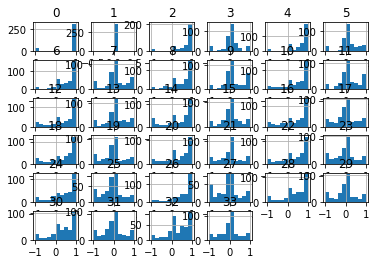

In [12]:
df.hist()
plt.show()

In [13]:
df = df.values
X = df[:, 0:34]
Y = df[:, 34]

In [14]:
X[:5],Y[:5]

(array([[1, 0, 0.99539, -0.05889, 0.8524299999999999, 0.02306,
         0.8339799999999999, -0.37708, 1.0, 0.0376, 0.8524299999999999,
         -0.17755, 0.59755, -0.44945, 0.60536, -0.38223,
         0.8435600000000001, -0.38542, 0.58212, -0.32192, 0.56971,
         -0.29674, 0.36946, -0.47357, 0.56811, -0.51171,
         0.41078000000000003, -0.46168000000000003, 0.21266, -0.3409,
         0.42267, -0.54487, 0.18641, -0.453],
        [1, 0, 1.0, -0.18829, 0.93035, -0.36156, -0.10868,
         -0.9359700000000001, 1.0, -0.045489999999999996, 0.50874,
         -0.67743, 0.34431999999999996, -0.69707, -0.51685, -0.97515,
         0.05499, -0.62237, 0.33109, -1.0, -0.13151, -0.453, -0.18056,
         -0.35734, -0.20332, -0.26569, -0.20468, -0.18400999999999998,
         -0.1904, -0.11592999999999999, -0.16626, -0.06287999999999999,
         -0.13738, -0.02447],
        [1, 0, 1.0, -0.03365, 1.0, 0.00485, 1.0, -0.12062, 0.88965,
         0.01198, 0.73082, 0.05346, 0.8544299999999999, 0.00

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y[:5]

array([1, 0, 1, 0, 1])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(34, input_dim=34, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 34)                1190      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 35        
Total params: 1,225
Trainable params: 1,225
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 235 samples, validate on 116 samples
Epoch 1/150
235/235 [==============================] - 1s 5ms/step - loss: 0.6784 - accuracy: 0.6426 - val_loss: 0.6703 - val_accuracy: 0.6638
Epoch 2/150
235/235 [==============================] - 0s 291us/step - loss: 0.6232 - accuracy: 0.7745 - val_loss: 0.6372 - val_accuracy: 0.6638
Epoch 3/150
235/235 [==============================] - 0s 295us/step - loss: 0.5670 - accuracy: 0.8000 - val_loss: 0.5849 - val_accuracy: 0.7759
Epoch 4/150
235/235 [==============================] - 0s 330us/step - loss: 0.5035 - accuracy: 0.8128 - val_loss: 0.5247 - val_accuracy: 0.8793
Epoch 5/150
235/235 [==============================] - 0s 254us/step - loss: 0.4499 - accuracy: 0.8255 - val_loss: 0.4751 - val_accuracy: 0.9052
Epoch 6/150
235/235 [==============================] - 0s 283us/step - loss: 0.4045 - accuracy: 0.8426 - val_loss: 0.4304 - val_accuracy: 0.8966
Epoch 7/150
235/235 [==============================] - 0s 303us/step - loss: 0.3693 - 

Epoch 57/150
235/235 [==============================] - 0s 296us/step - loss: 0.0713 - accuracy: 0.9702 - val_loss: 0.0931 - val_accuracy: 0.9914
Epoch 58/150
235/235 [==============================] - 0s 288us/step - loss: 0.0694 - accuracy: 0.9745 - val_loss: 0.0920 - val_accuracy: 0.9914
Epoch 59/150
235/235 [==============================] - 0s 322us/step - loss: 0.0680 - accuracy: 0.9787 - val_loss: 0.0895 - val_accuracy: 0.9914
Epoch 60/150
235/235 [==============================] - 0s 305us/step - loss: 0.0666 - accuracy: 0.9745 - val_loss: 0.0890 - val_accuracy: 0.9914
Epoch 61/150
235/235 [==============================] - 0s 283us/step - loss: 0.0656 - accuracy: 0.9830 - val_loss: 0.0888 - val_accuracy: 0.9914
Epoch 62/150
235/235 [==============================] - 0s 282us/step - loss: 0.0652 - accuracy: 0.9830 - val_loss: 0.0853 - val_accuracy: 0.9914
Epoch 63/150
235/235 [==============================] - 0s 323us/step - loss: 0.0621 - accuracy: 0.9872 - val_loss: 0.0866 -

235/235 [==============================] - 0s 284us/step - loss: 0.0248 - accuracy: 0.9957 - val_loss: 0.0683 - val_accuracy: 0.9914
Epoch 114/150
235/235 [==============================] - 0s 277us/step - loss: 0.0248 - accuracy: 0.9915 - val_loss: 0.0702 - val_accuracy: 0.9828
Epoch 115/150
235/235 [==============================] - 0s 304us/step - loss: 0.0238 - accuracy: 0.9957 - val_loss: 0.0693 - val_accuracy: 0.9914
Epoch 116/150
235/235 [==============================] - 0s 344us/step - loss: 0.0235 - accuracy: 0.9957 - val_loss: 0.0686 - val_accuracy: 0.9828
Epoch 117/150
235/235 [==============================] - 0s 265us/step - loss: 0.0231 - accuracy: 0.9957 - val_loss: 0.0686 - val_accuracy: 0.9828
Epoch 118/150
235/235 [==============================] - 0s 304us/step - loss: 0.0228 - accuracy: 0.9957 - val_loss: 0.0715 - val_accuracy: 0.9828
Epoch 119/150
235/235 [==============================] - 0s 326us/step - loss: 0.0227 - accuracy: 0.9957 - val_loss: 0.0683 - val_ac

In [24]:


model = Sequential()
model.add(Dropout(0.2, input_shape=(34,)))
model.add(Dense(34,  kernel_initializer='normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 34)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 34)                1190      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 35        
Total params: 1,225
Trainable params: 1,225
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 235 samples, validate on 116 samples
Epoch 1/150
235/235 [==============================] - 1s 4ms/step - loss: 0.6735 - accuracy: 0.6213 - val_loss: 0.6919 - val_accuracy: 0.6034
Epoch 2/150
235/235 [==============================] - 0s 300us/step - loss: 0.6288 - accuracy: 0.7702 - val_loss: 0.6677 - val_accuracy: 0.6466
Epoch 3/150
235/235 [==============================] - 0s 317us/step - loss: 0.5739 - accuracy: 0.7957 - val_loss: 0.6223 - val_accuracy: 0.7328
Epoch 4/150
235/235 [==============================] - 0s 326us/step - loss: 0.5229 - accuracy: 0.8000 - val_loss: 0.5666 - val_accuracy: 0.8103
Epoch 5/150
235/235 [==============================] - 0s 302us/step - loss: 0.4714 - accuracy: 0.8170 - val_loss: 0.5012 - val_accuracy: 0.8707
Epoch 6/150
235/235 [==============================] - 0s 324us/step - loss: 0.4250 - accuracy: 0.8340 - val_loss: 0.4751 - val_accuracy: 0.8879
Epoch 7/150
235/235 [==============================] - 0s 272us/step - loss: 0.3960 - 

235/235 [==============================] - 0s 334us/step - loss: 0.1363 - accuracy: 0.9447 - val_loss: 0.1234 - val_accuracy: 0.9741
Epoch 57/150
235/235 [==============================] - 0s 311us/step - loss: 0.1216 - accuracy: 0.9617 - val_loss: 0.1183 - val_accuracy: 0.9741
Epoch 58/150
235/235 [==============================] - 0s 322us/step - loss: 0.1476 - accuracy: 0.9447 - val_loss: 0.1224 - val_accuracy: 0.9828
Epoch 59/150
235/235 [==============================] - 0s 309us/step - loss: 0.1284 - accuracy: 0.9489 - val_loss: 0.1174 - val_accuracy: 0.9741
Epoch 60/150
235/235 [==============================] - 0s 325us/step - loss: 0.1287 - accuracy: 0.9574 - val_loss: 0.1172 - val_accuracy: 0.9741
Epoch 61/150
235/235 [==============================] - 0s 317us/step - loss: 0.1496 - accuracy: 0.9532 - val_loss: 0.1211 - val_accuracy: 0.9741
Epoch 62/150
235/235 [==============================] - 0s 283us/step - loss: 0.1449 - accuracy: 0.9319 - val_loss: 0.1205 - val_accuracy

235/235 [==============================] - 0s 311us/step - loss: 0.0978 - accuracy: 0.9617 - val_loss: 0.0912 - val_accuracy: 0.9741
Epoch 113/150
235/235 [==============================] - 0s 306us/step - loss: 0.0763 - accuracy: 0.9830 - val_loss: 0.0884 - val_accuracy: 0.9741
Epoch 114/150
235/235 [==============================] - 0s 341us/step - loss: 0.0799 - accuracy: 0.9745 - val_loss: 0.0844 - val_accuracy: 0.9741
Epoch 115/150
235/235 [==============================] - 0s 357us/step - loss: 0.0828 - accuracy: 0.9702 - val_loss: 0.0866 - val_accuracy: 0.9828
Epoch 116/150
235/235 [==============================] - 0s 267us/step - loss: 0.1005 - accuracy: 0.9574 - val_loss: 0.0861 - val_accuracy: 0.9741
Epoch 117/150
235/235 [==============================] - 0s 320us/step - loss: 0.0923 - accuracy: 0.9745 - val_loss: 0.0854 - val_accuracy: 0.9741
Epoch 118/150
235/235 [==============================] - 0s 321us/step - loss: 0.0847 - accuracy: 0.9660 - val_loss: 0.0866 - val_ac

In [26]:


model = Sequential()
model.add(Dropout(0.2, input_shape=(34,)))
model.add(Dense(34,  kernel_initializer='normal', activation = 'relu'))
model.add(Dense(8,  kernel_initializer='normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 34)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 34)                1190      
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 280       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 1,479
Trainable params: 1,479
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, validation_split=0.33, nb_epoch=150)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 235 samples, validate on 116 samples
Epoch 1/150
235/235 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 0.5660 - val_loss: 0.6923 - val_accuracy: 0.7069
Epoch 2/150
235/235 [==============================] - 0s 89us/step - loss: 0.6909 - accuracy: 0.7574 - val_loss: 0.6918 - val_accuracy: 0.5862
Epoch 3/150
235/235 [==============================] - 0s 83us/step - loss: 0.6878 - accuracy: 0.7872 - val_loss: 0.6912 - val_accuracy: 0.5862
Epoch 4/150
235/235 [==============================] - 0s 98us/step - loss: 0.6827 - accuracy: 0.7787 - val_loss: 0.6909 - val_accuracy: 0.5690
Epoch 5/150
235/235 [==============================] - 0s 133us/step - loss: 0.6750 - accuracy: 0.7702 - val_loss: 0.6909 - val_accuracy: 0.5776
Epoch 6/150
235/235 [==============================] - 0s 148us/step - loss: 0.6625 - accuracy: 0.7787 - val_loss: 0.6884 - val_accuracy: 0.5862
Epoch 7/150
235/235 [==============================] - 0s 99us/step - loss: 0.6458 - accu

Epoch 57/150
235/235 [==============================] - 0s 140us/step - loss: 0.1299 - accuracy: 0.9447 - val_loss: 0.0964 - val_accuracy: 0.9828
Epoch 58/150
235/235 [==============================] - 0s 142us/step - loss: 0.1546 - accuracy: 0.9404 - val_loss: 0.0983 - val_accuracy: 0.9828
Epoch 59/150
235/235 [==============================] - 0s 130us/step - loss: 0.1522 - accuracy: 0.9404 - val_loss: 0.0977 - val_accuracy: 0.9828
Epoch 60/150
235/235 [==============================] - 0s 132us/step - loss: 0.1339 - accuracy: 0.9447 - val_loss: 0.1001 - val_accuracy: 0.9828
Epoch 61/150
235/235 [==============================] - 0s 127us/step - loss: 0.1386 - accuracy: 0.9319 - val_loss: 0.1024 - val_accuracy: 0.9828
Epoch 62/150
235/235 [==============================] - 0s 134us/step - loss: 0.1355 - accuracy: 0.9532 - val_loss: 0.1004 - val_accuracy: 0.9828
Epoch 63/150
235/235 [==============================] - 0s 153us/step - loss: 0.1204 - accuracy: 0.9532 - val_loss: 0.0985 -

235/235 [==============================] - 0s 138us/step - loss: 0.1053 - accuracy: 0.9617 - val_loss: 0.0711 - val_accuracy: 0.9914
Epoch 114/150
235/235 [==============================] - 0s 133us/step - loss: 0.0909 - accuracy: 0.9745 - val_loss: 0.0697 - val_accuracy: 0.9914
Epoch 115/150
235/235 [==============================] - 0s 141us/step - loss: 0.1031 - accuracy: 0.9617 - val_loss: 0.0681 - val_accuracy: 0.9914
Epoch 116/150
235/235 [==============================] - 0s 125us/step - loss: 0.0779 - accuracy: 0.9787 - val_loss: 0.0645 - val_accuracy: 0.9914
Epoch 117/150
235/235 [==============================] - 0s 153us/step - loss: 0.1118 - accuracy: 0.9574 - val_loss: 0.0679 - val_accuracy: 0.9914
Epoch 118/150
235/235 [==============================] - 0s 116us/step - loss: 0.0848 - accuracy: 0.9702 - val_loss: 0.0699 - val_accuracy: 0.9914
Epoch 119/150
235/235 [==============================] - 0s 130us/step - loss: 0.0865 - accuracy: 0.9617 - val_loss: 0.0721 - val_ac